In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\tkmra\Downloads\used_cars_data.csv')
df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [59]:

missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values for each column:")
print(missing_percentage)




Percentage of missing values for each column:
S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64


In [73]:

columns_to_impute = missing_percentage[missing_percentage < 20].index
print("\nColumns with less than 20% missing values to be imputed:")
print(columns_to_impute)


Columns with less than 20% missing values to be imputed:
Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


In [72]:
for column in columns_to_impute:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        print(f"Filling missing values in column '{column}' with mode: {mode_value}")
        df[column].fillna(mode_value, inplace=True)
    else:
        median_value = df[column].median()
        print(f"Filling missing values in column '{column}' with median: {median_value}")
        df[column].fillna(median_value, inplace=True)


Filling missing values in column 'S.No.' with median: 3626.0
Filling missing values in column 'Name' with mode: Mahindra XUV500 W8 2WD
Filling missing values in column 'Location' with mode: Mumbai
Filling missing values in column 'Year' with median: 2014.0
Filling missing values in column 'Kilometers_Driven' with median: 53416.0
Filling missing values in column 'Fuel_Type' with mode: Diesel
Filling missing values in column 'Transmission' with mode: Manual
Filling missing values in column 'Owner_Type' with mode: First
Filling missing values in column 'Mileage' with median: 18.16
Filling missing values in column 'Engine' with median: 1462.0
Filling missing values in column 'Power' with median: 93.0
Filling missing values in column 'Seats' with median: 5.0
Filling missing values in column 'Price' with median: 5.64


In [74]:
print("\nDataset info after imputation:")
print(df.info())



Dataset info after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   float64
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB
None


In [61]:

print("\nPercentage of missing values after imputation:")
print(df.isnull().mean() * 100)


Percentage of missing values after imputation:
S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.000000
Power                 0.000000
Seats                 0.000000
New_Price            86.129877
Price                 0.000000
dtype: float64


C:\Users\tkmra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


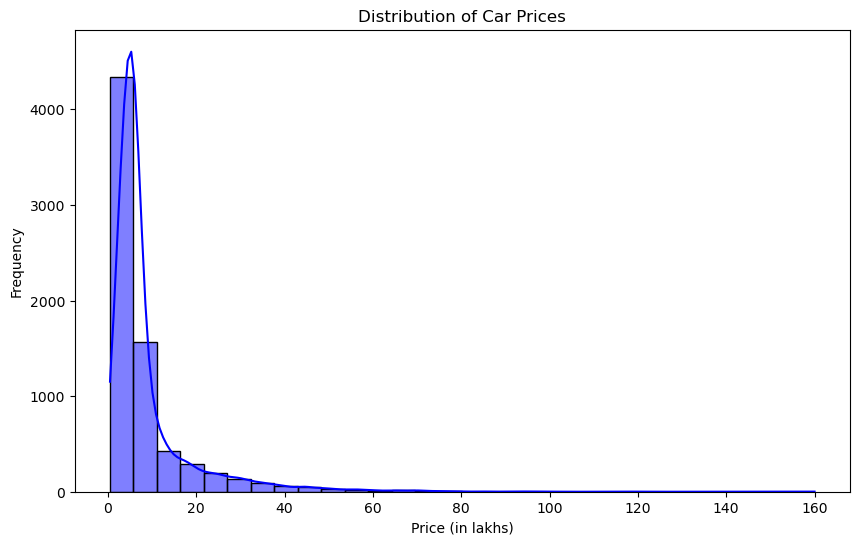

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

In [70]:

correlation_price = df[['Price', 'Year', 'Kilometers_Driven', 'Mileage']].corr()['Price']
print("Correlation coefficients with Price:")
print(correlation_price)

Correlation coefficients with Price:
Price                1.000000
Year                 0.276009
Kilometers_Driven   -0.011062
Mileage             -0.278215
Name: Price, dtype: float64


In [68]:

numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

correlation_price = df[numerical_features + ['Price']].corr()['Price']

sorted_correlation = correlation_price.abs().sort_values(ascending=False)

print("Correlation coefficients with Price:")
print(sorted_correlation)


Correlation coefficients with Price:
Price                1.000000
Power                0.703036
Engine               0.601381
Mileage              0.278215
Year                 0.276009
Seats                0.047136
Kilometers_Driven    0.011062
Name: Price, dtype: float64


In [69]:
# Categorical features

for feature in categorical_features:
    groups = df.groupby(feature)['Price'].apply(list)
    f_statistic, p_value = f_oneway(*groups)
    print("\nANOVA Test for", feature)
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)


ANOVA Test for Fuel_Type
F-Statistic: 167.60526785832084
P-Value: 1.7895904293461928e-137

ANOVA Test for Transmission
F-Statistic: 2872.0884035354015
P-Value: 0.0

ANOVA Test for Owner_Type
F-Statistic: 18.47128662948286
P-Value: 6.2024912738614114e-12
